<h1><font color='black'>Joining data in Pandas</font></h1>

<br>

<br>

<p align="center" width="100%">
    <img width="50%" src="Assets\inner_join_1.png">
</p>

<br>

<h3><font color='grey'>Pandas basics</font></h3>

<p>Combining data points across multiple sources is made possible using <code>merge</code>. With a common value, such as a <code>unique_id</code>, relationships can be formed between tables allowing additional data points to be retrieved. Merging data frames is a useful way to access lookup tables where data typically has a one-to-one relationship, like pulling through a user's <code>average_order_value</code> from a neighbouring table. Tables with a one-to-many relationship can be merged to pull through multiple observations, e.g. joining an accounts_table to a <code>pages_viewed</code>. The nature of the join (<code>inner/left/right/outer</code>) will impact what data is filtered and whether a merge will pull through Null values.</p>

<ul>
    <li><b><code>pd.DataFrame()</code></b> - Data frames are table structures that contain data. The function <code>csv_to_df</code> reads <code>.csv</code> files and stores the data as data frames to be used later when building merges. The data frame <code>jrny</code> contains digital journey touchpoints for each session which will be used as a primary reference.</li>
    <br>
    <li><b><code>df.merge()</code></b> - The <code>merge()</code> method updates the content of two data frames by merging them together, using specified methods, such as fields and the nature of the merge. Depending on data relationships, the resulting merge can produce a one-to-one or one-to-many output.</li>
    <br>
    <li><b><code>on='col'</code></b> - Specifies the field(s) the merge will be performed on, e.g. an <code>id</code> field merge requires an <code>id</code>column present in both data frames. Alternatively, if the column names differ between data frames, <code>left_on</code> and <code>right_on</code> are specified.</li>
    <br>
    <li><b><code>how='inner/left/right/outer'</code></b> - Describes the nature of the join, with each producing different results. These are explored below.</li>
</ul>

<br>

In [1]:
# pandas
import pandas as pd

# libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# style
from ipynb.fs.full.Style_Sheet import *
plt.style.use(style_use)
plt.rcParams.update(style_params)

# import data
def csv_to_df(file_path):
    df = pd.read_csv(file_path)
    return df

# session journey data
jrny = csv_to_df('data_journey.csv')
jrny.head()

,session_id,account_login,basket_page,checkout_page,order_placed
0,ad22f37f-3090,0,0,0,0
1,dec34cea-8172,0,0,0,0
2,532c96bd-5036,1,0,0,0
3,5c503911-6193,0,0,0,0
4,a36043e6-3259,1,0,0,0


<hr>

<br>

<h2><font color='black'>Inner merge</font></h2>

<h3><font color='grey'>Logins who also ordered</font></h3>

<p>An <code>inner merge</code> ensures only common values from each table are returned. Below, an inner merge is used to produce <code>session_id</code> that have logged into their account domain <b>and</b> placed an order during the same session. Any sessions that do not meet both of these criteria will be excluded from the final results.</p>

<ul>
    <li><b><code>lgn</code></b> - Sessions who logged into their account domains.</li>
    <br>
    <li><b><code>ord</code></b> - Sessions who placed an order.</li>
    <br>
    <li><b><code>lgn_ord</code></b> - Result of <code>inner merge</code>, producing sessions who both logged into their account & ordered.</li>
</ul>

<br>

In [2]:
# account logins
lgn_crit = jrny['account_login']==1
lgn_cols = ['session_id', 'account_login']
lgn = jrny[lgn_cols][lgn_crit]
lgn_n = lgn.shape[0]

# sessions placing an order
ord_crit = jrny['order_placed']==1
ord_cols = ['session_id', 'order_placed']
ord = jrny[ord_cols][ord_crit]
ord_n = ord.shape[0]

# merge
lgn_ord = lgn.merge(ord, on='session_id', how='inner')
lgn_ord_n = lgn_ord.shape[0]
print('No. logins who also ordered: ' + str(lgn_ord_n))
lgn_ord.head()

No. logins who also ordered: 271


,session_id,account_login,order_placed
0,47efb53a-8254,1,1
1,67bdf976-8388,1,1
2,a70e0f87-6234,1,1
3,aa7fd9ee-3825,1,1
4,41114e0f-2459,1,1


<hr>

<br>

<h2><font color='black'>Left merge</font></h2>

<h3><font color='grey'>Pulling in device data</font></h3>

<p>A <code>left merge</code> returns a dataframe containing all the rows of the left dataframe. All the non-matching rows of the left dataframe contain <code>NaN</code> for the columns in the right dataframe. Below, the <code>jrny</code> data is left merged to a <code>device_type</code> table to see how many sessions have valid data and how many are missing device data.</p>

<ul>
    <li><b><code>jrny</code></b> - Journey touchpoints data for 10,000 <code>session_id</code>.</li>
    <br>
    <li><b><code>dev</code></b> - <code>device_type</code> data for 8,022 <code>session_id</code>.</li>
    <br>
    <li><b><code>jrny_dev</code></b> - With a <code>left merge</code> applied, the obsevartions who successfully joined will return <code>device_type</code> data, while <code>Null</code> values are returned for the observations not present in <code>dev</code>. The results of the pie graph illustrate that 20% of <code>session_id</code> from <code>jrny</code> are missing device data in <code>dev</code>.</li>
</ul>

<br>

In [3]:
# device
dev = csv_to_df('data_device.csv')
jrny_dev = jrny.merge(dev, on='session_id', how='left')
jrny_dev['device_type'] = jrny_dev['device_type'].fillna('Unknown')
jrny_dev.head()

,session_id,account_login,basket_page,checkout_page,order_placed,device_type
0,ad22f37f-3090,0,0,0,0,Desktop
1,dec34cea-8172,0,0,0,0,Unknown
2,532c96bd-5036,1,0,0,0,Unknown
3,5c503911-6193,0,0,0,0,App iOS
4,a36043e6-3259,1,0,0,0,App Android


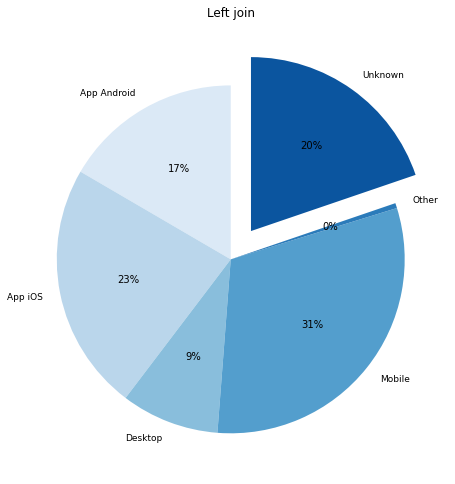

In [4]:
# pivot
jrny_dev_piv = jrny_dev.groupby('device_type').agg({'session_id': 'count'})

# pie graph
def viz_pie(ax, y, labels, explode):
    ax.pie(y, labels=labels, explode=explode, startangle=90, colors=palette_blues, autopct='%.0f%%')
    ax.set_title(title)
    
# variables
y = jrny_dev_piv['session_id']
labels = jrny_dev_piv.index
explode = [0, 0, 0, 0, 0, 0.2]
title = 'Left join'

# viz
fig, ax_1 = plt.subplots(nrows=1, ncols=1, figsize=(15,8))
viz_pie(ax_1, y, labels, explode)
plt.show()

<hr>

<br>

<h2><font color='black'>Right merge</font></h2>

<h3><font color='grey'>Limiting to sessions with device data only</font></h3>

<p>A <code>right merge</code> is similar to left. The only difference is that all the rows of the right dataframe are taken as it is and only those of the left dataframe that are common in both. Below, the <code>jrny</code> data is left merged to a <code>device_type</code> table to see how many sessions have valid data and how many are missing device data.</p>

<ul>
    <li><b><code>jrny_dev_r</code></b> - A <code>right merge</code> is applied, returning all sessions from <code>dev</code> and corresponding fields from <code>jrny</code>.</li>
    <br>
    <li><b><code>dev_summary</code></b> - Volume comparisons are made between the results of a left and right merge, with the right merge returning fewer rows virtue of <code>dev</code> having few rows. The bar graph illustrates the volume differences between a left and right merge - left returns <code>Nan/Unknowns</code> while right cannot.</li>
</ul>

<br>

In [5]:
# right merge
jrny_dev_r = jrny.merge(dev, on='session_id', how='right')
jrny_dev_r_piv = jrny_dev_r.groupby('device_type').agg({'session_id': 'count'})
jrny_dev_r.head()

,session_id,account_login,basket_page,checkout_page,order_placed,device_type
0,ad22f37f-3090,0,0,0,0,Desktop
1,5c503911-6193,0,0,0,0,App iOS
2,a36043e6-3259,1,0,0,0,App Android
3,fbe343ca-4075,0,0,0,0,App Android
4,efaee988-3573,0,1,1,0,Mobile


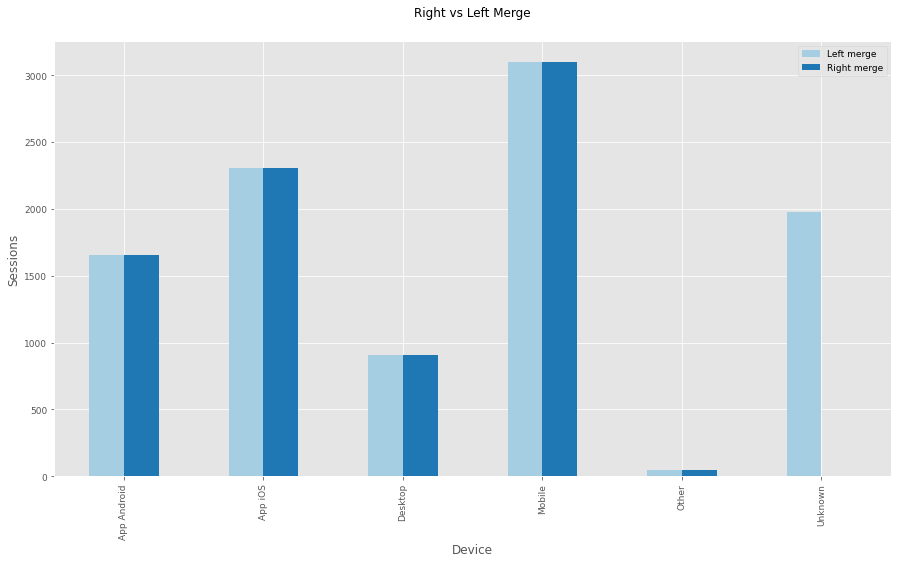

In [6]:
# compare left & right merge
dev_summary = jrny_dev_piv.merge(jrny_dev_r_piv, left_index=True, right_index=True, how='left')
dev_summary.columns = ['Left merge', 'Right merge']

# bar graph
def viz_bar(ax, data, stacked, title, y_label, x_label):
    data.plot(ax=ax, kind='bar', stacked=stacked, color=palette_paired, alpha=1)
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)

# viz
fig, ax_1 = plt.subplots(nrows=1, ncols=1, figsize=(15,8))
viz_bar(ax_1, dev_summary, False, 'Right vs Left Merge', 'Sessions', 'Device')
plt.show()

<hr>

<br>

<h2><font color='black'>Outer merge</font></h2>

<h3><font color='grey'>Pulling all sessions from both tables</font></h3>


<p>With an <code>outer join</code>, unmatched rows in one or both tables can be returned. This is the case even if the merge condition fails for an observation. Below, an outer merge is used to combine all rows from a table of desktop users (<code>desk</code>) and a table of ordering sessions (<code>ord</code>). The result is the dataframe <code>desk_ord</code> that consists of all sessions from each table, with <code>NaN</code> values indicating whether or not the session appears in either table.</p>

<ul>
    <li><b><code>desk</code></b> - Table of desktop users, retrieved by subsetting <code>dev</code>.</li>
    <br>
    <li><b><code>desk_ord</code></b> - <code>desk</code> is outer merged with <code>ord</code> to produce a dataframe of all sessions from each table. The <code>NaN</code> values indicate presence in respective tables.</li>
    <br>
    <li><b><code>desk_ord_piv</code></b> - Aggregates sessions to display which table(s) sessions appear in. The pie graph illustrates that just 3% of desktop users placed an order.</li>
</ul>

<br>

In [9]:
# desktop users only
crit = dev['device_type']=='Desktop'
desk = dev[crit]

# outer merge with orders
desk_ord = desk.merge(ord, on='session_id', how='outer').sort_values('session_id')

# show
desk_ord.head()

,session_id,device_type,order_placed
15,0005054a-1608,Desktop,NaN
554,00302377-8608,Desktop,NaN
1161,0047ab48-5829,NaN,1.0
430,00b58c45-8040,Desktop,NaN
754,01224244-8175,Desktop,NaN


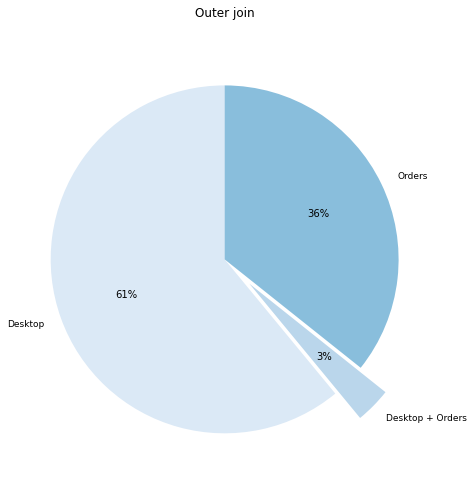

In [14]:
# fill na
desk_ord['device_type'] = desk_ord['device_type'].fillna('Unknown')
desk_ord['order_placed'] = desk_ord['order_placed'].fillna(0)

# pivot
groupby = ['device_type', 'order_placed']
desk_ord_piv = desk_ord.groupby(groupby).agg({'session_id':'count'})

# pie variables
y = desk_ord_piv['session_id']
labels = ['Desktop', 'Desktop + Orders', 'Orders']
explode = [0, 0.2, 0]
title = 'Outer join'

# show
fig, ax_1 = plt.subplots(nrows=1, ncols=1, figsize=(15,8))
viz_pie(ax_1, y, labels, explode)
plt.show()